### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [45]:
data = pd.read_csv('data/coupons.csv')

In [46]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [47]:
# Review the list of existing nulls
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [48]:
# Delete column car which has 12576 nulls
clearData = data.drop(['car'], axis = 1)
clearData.isna().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [49]:
# Verify duplicate records
clearData.duplicated().value_counts()

False    12610
True        74
Name: count, dtype: int64

In [50]:
clearData = clearData[clearData.duplicated() == False]

In [51]:
# Rename columns
clearData = clearData.rename(columns = { 
    'Y': 'accepted', 'Bar': 'bar', 'CoffeeHouse': 'coffeeHouse', 
    'RestaurantLessThan20': 'restaurantLessThan20', 'Restaurant20To50' : 'restaurant20To50',
    'coupon' : 'couponType'
})
# Replace some Values
clearData['accepted'] = clearData['accepted'].replace(0, 'No').replace(1, 'Yes')

In [52]:
# Replace and format numeric values
clearData["age"] = pd.to_numeric(clearData["age"].str.replace('50plus', '50').str.replace('below21', '20'))

In [53]:
# Replace and format numeric values
clearData["income"] = pd.to_numeric(clearData["income"].str.replace('$37500 - $49999', '49999').str.replace('$62500 - $74999', '74999').str.replace('$12500 - $24999', '24999').str.replace('$75000 - $87499', '87499').str.replace('$50000 - $62499', '62499').str.replace('$25000 - $37499', '37499').str.replace('$100000 or More', '100000').str.replace('$87500 - $99999', '99999').str.replace('Less than $12500', '12499'))

4. What proportion of the total observations chose to accept the coupon? 



In [54]:
proportionAccepted = (clearData.query("accepted == 'Yes'")['accepted'].count()/clearData['accepted'].count())*100
print('Proportion of coupons Acepted: %.3f%%' % proportionAccepted)

Proportion of coupons Acepted: 56.757%


5. Use a bar plot to visualize the `coupon` column.

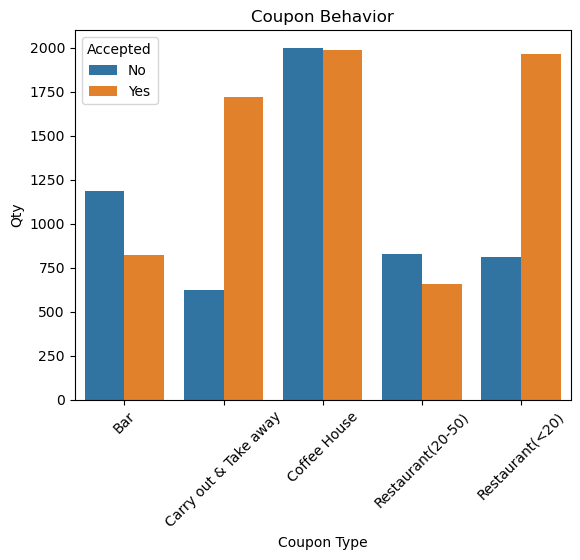

In [78]:
plotDF = clearData.groupby(['couponType','accepted'])['accepted'].size().reset_index(name='counts')
plotDF = plotDF.rename(columns = { 'counts': 'Qty'})

ax = sns.barplot(plotDF, x='couponType', y='Qty', hue="accepted")
plt.title("Coupon Behavior")
plt.xticks(rotation = 45)
ax.set_ylabel("Qty")
ax.set_xlabel("Coupon Type")
ax.legend(title='Accepted')
ax

plt.savefig("images/fig1.png")

6. Use a histogram to visualize the temperature column.

[Text(0.5, 0, 'Temperature (F)'), Text(0, 0.5, 'Qty')]

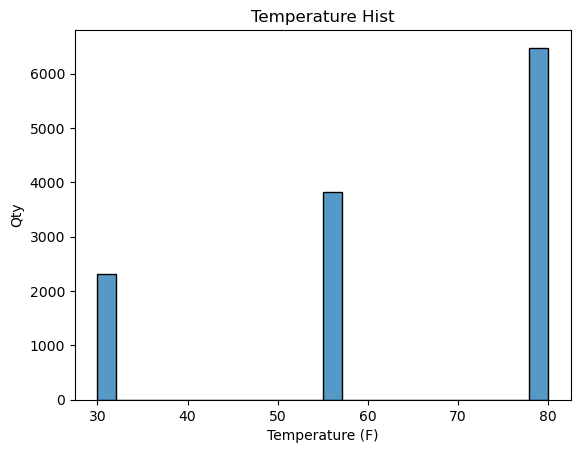

In [56]:
ax= sns.histplot(clearData['temperature'])
plt.title('Temperature Hist')
ax.set(xlabel='Temperature (F)', ylabel='Qty')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [57]:
barDF = clearData.query("couponType == 'Bar'")
barDF.head(5)

,destination,passanger,weather,temperature,time,couponType,expiration,gender,age,maritalStatus,...,coffeeHouse,CarryAway,restaurantLessThan20,restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,No
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,Yes
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,No
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,Yes
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,Yes


2. What proportion of bar coupons were accepted?


In [58]:
proportionBar = (clearData.query("couponType == 'Bar' & accepted == 'Yes'")['accepted'].count() / clearData['accepted'].count()) * 100
print('Proportion of Bar coupons Acepted: %.3f%%' % proportionBar)

Proportion of Bar coupons Acepted: 6.534%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [59]:
barFilterOcacional = ['never','less1', '1~3']
barOcacional = (clearData.query("bar in @barFilterOcacional & accepted == 'Yes'")['bar'].count() / clearData['bar'].count())* 100

print('Acceptance rate of those who went to a bar 3 or fewer times: %.3f%%' % barOcacional)

barFiltersFrequent = ['4~8', 'gt8']
barFrequent = (clearData.query("bar in @barFiltersFrequent & accepted == 'Yes'")['bar'].count() / clearData['bar'].count())* 100

print('Acceptance rate of those who went more than 3 times: %.3f%%' % barFrequent)

Acceptance rate of those who went to a bar 3 or fewer times: 49.748%
Acceptance rate of those who went more than 3 times: 7.054%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [60]:
barFilterOcacional = ['1~3', '4~8', 'gt8']
barG25 = (clearData.query("bar in @barFilterOcacional & age > 25 & accepted == 'Yes'")['bar'].count() / clearData['bar'].count())* 100

print('Drivers who go to a bar more than once a month and are over the age of 25: %.3f%%' % barOcacional)

barOthers = ((clearData.query("accepted == 'Yes'")['bar'].count() - clearData.query("bar in @barFilterOcacional & age > 25 & accepted == 'Yes'")['bar'].count()) / clearData['bar'].count())* 100

print('Others: %.3f%%' % barOthers)

Drivers who go to a bar more than once a month and are over the age of 25: 49.748%
Others: 43.078%


In [61]:
#### it is evident in the proportions that drivers over 25 years old 
#### accept (13.725%) and frequent the coupons for bars less frequently than other drivers (43.078%), 
#### this indicates that young drivers frequent bars more frequently.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [62]:
barFilterOcacional = ['1~3', '4~8', 'gt8']
barWithOutKids = (clearData.query("bar in @barFilterOcacional & passanger != 'Kid(s)' & accepted == 'Yes' & occupation != 'Farming Fishing & Forestry'")['bar']
    .count() / clearData['bar'].count())* 100

print('Drivers passanger without kids: %.3f%%' % barWithOutKids)

barOthers = ((clearData.query("accepted == 'Yes'")['bar'].count() -  clearData.query("bar in @barFilterOcacional & passanger != 'Kid(s)' & accepted == 'Yes' & occupation != 'Farming Fishing & Forestry'")['bar']
    .count())/clearData['bar'].count())*100

print('Others: %.3f%%' % barOthers)

Drivers passanger without kids: 18.340%
Others: 38.463%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [63]:
barFilterOcacional = ['1~3', '4~8', 'gt8']
barWithOutKidsNotWidowed = (clearData.query("bar in @barFilterOcacional & passanger != 'Kid(s)' & accepted == 'Yes' & maritalStatus != 'Widowed'")['bar']
    .count() / clearData['bar'].count())* 100

print('Drivers passanger without kids and not widowed: %.3f%%' % barWithOutKidsNotWidowed)

barUnder30 = (clearData.query("bar in @barFilterOcacional & accepted == 'Yes' & age < 30")['bar']
    .count() / clearData['bar'].count())* 100

print('Drivers under 30: %.3f%%' % barUnder30)

restaurantFilterOcacional = ['4~8','gt8']
resturantCheap = (clearData.query("restaurantLessThan20 in @restaurantFilterOcacional & income < 50_000 & accepted == 'Yes'")['bar']
    .count() / clearData['bar'].count())* 100

print('Drivers cheap resturants mor than 4 times: %.3f%%' % resturantCheap)

Drivers passanger without kids and not widowed: 18.340%
Drivers under 30: 11.373%
Drivers cheap resturants mor than 4 times: 10.821%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

After the analysis generated from the questions we can see that the proportion of coupons to the bar was around 6%, also we can see that most of them were from customers 3 or less times (49.78%), there is no clear influence on the age for acceptance, there is a coincidence in not having children, the occupation other than farming, fishing, or forestry and under the age of 30 have the same percentage of acceptance (18.340%).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. I have decided to use the Coffee House coupon type for my research, since the graph showed it to be very similar in its acceptance behavior.

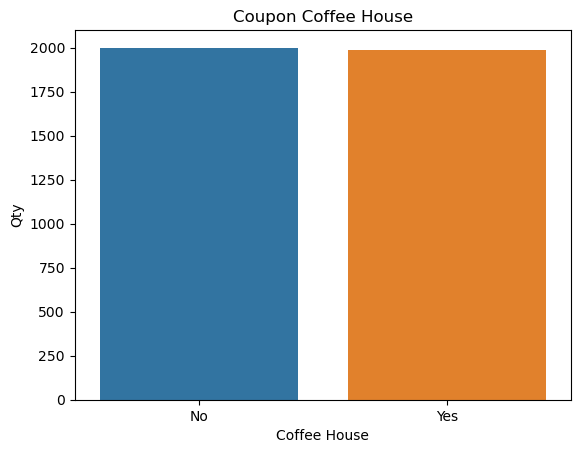

In [77]:
#create a new DF based on the clear data
coffeeDF = clearData.query("couponType == 'Coffee House'")

# ploting my observation
ax = sns.countplot(coffeeDF, x='accepted')
plt.title("Coupon Coffee House")
#plt.xticks(rotation = 45)
ax.set_ylabel("Qty")
ax.set_xlabel("Coffee House")
ax

plt.savefig("images/fig2.png")

In [65]:
coffeeDF.head(5)

,destination,passanger,weather,temperature,time,couponType,expiration,gender,age,maritalStatus,...,coffeeHouse,CarryAway,restaurantLessThan20,restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,accepted
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,No
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,No
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,No
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,Yes
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,No


### Conclusion 1

It is found that those who are most offered the coffee house coupon, but in proportion are also those who reject it the most, it seems that the driver offered more this type of coupon to single people. also the next in quantity is the passenger friends, which in proportion accept more than the rest, as well as the partners.

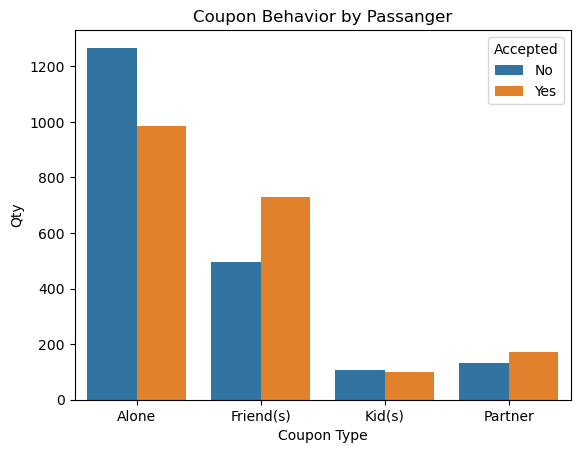

In [76]:
plotDF = coffeeDF.groupby(['passanger','accepted'])['accepted'].size().reset_index(name='counts')
plotDF = plotDF.rename(columns = { 'counts': 'Qty'})

ax = sns.barplot(plotDF, x='passanger', y='Qty', hue="accepted")
plt.title("Coupon Behavior by Passanger")
ax.set_ylabel("Qty")
ax.set_xlabel("Coupon Type")
ax.legend(title='Accepted')
ax

plt.savefig("images/fig3.png")

### Conclusion 2

It seems that drivers offer more coffee house coupons when the days are sunny, and the behavior is quite similar to single people are rejected and accepted in equal proportion.

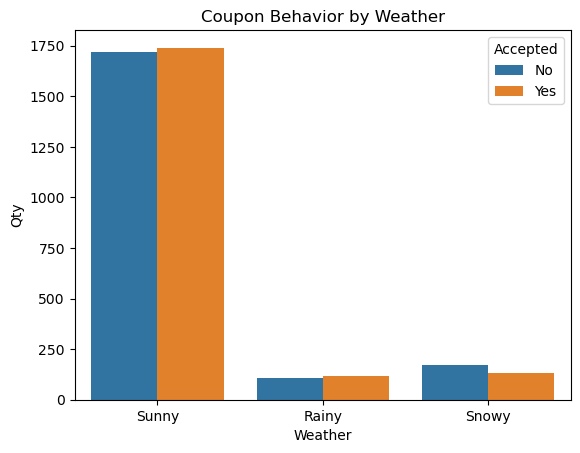

In [73]:
ax = sns.countplot(coffeeDF, x="weather", hue="accepted")
plt.title("Coupon Behavior by Weather")
ax.set_ylabel("Qty")
ax.set_xlabel("Weather")
ax.legend(title='Accepted')
ax

plt.savefig("images/fig4.png")

### Conclusion 3

When we verify the behavior of the coupons for coffee house in age range, we can see that in a range of 21 to 31 years old, most of these coupons are offered with a fairly balanced behavior in the acceptances, this can give us an idea that young people are the ones who most use this type of coupons and we see a slight upturn in the age range of 50 years old.

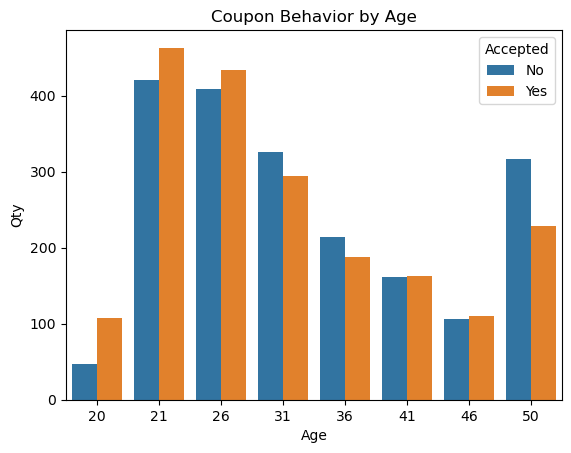

In [75]:
ax = sns.countplot(coffeeDF, x="age", hue="accepted")
plt.title("Coupon Behavior by Age")
ax.set_ylabel("Qty")
ax.set_xlabel("Age")
ax.legend(title='Accepted')
ax

plt.savefig("images/fig5.png")

### Conclusion 4

As expected after analyzing the data according to the destination of the people, this coupon is more used when people do not have any urgency to go somewhere, also as we have been analyzing the other coupons are more used by people who are single or married.

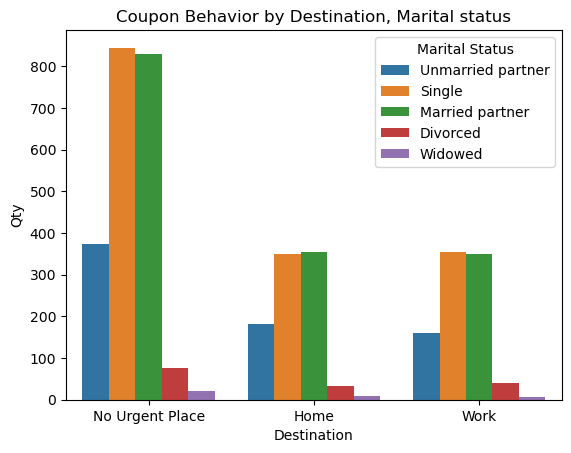

In [74]:
ax = sns.countplot(coffeeDF, x='destination', hue='maritalStatus')
plt.title("Coupon Behavior by Destination, Marital status")
ax.set_ylabel("Qty")
ax.set_xlabel("Destination")
ax.legend(title='Marital Status')
ax

plt.savefig("images/fig6.png")